# Botanist
Anutida Sangkla

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import matplotlib.image as mpimg
%matplotlib inline

#### Import filenames and labels of images

In [4]:
traindf = pd.read_csv('Botanist_Training_Set.csv',dtype = str)
traindf.head()

,FileName,Label
0,45945143,6
1,91233284,25
2,3082537,17
3,13822720,7
4,17579915,25


In [5]:
testdf = pd.read_csv('Botanist_Test_Set.csv',dtype = str)
testdf.head()

,FileName
0,64559325
1,52439467
2,1336013
3,77778059
4,28148617


#### Add file extension to all images

In [6]:
def append_ext(fn):
    return fn+ ".jpg"

traindf["FileName"] = traindf["FileName"].apply(append_ext)
traindf.head(5)

,FileName,Label
0,45945143.jpg,6
1,91233284.jpg,25
2,3082537.jpg,17
3,13822720.jpg,7
4,17579915.jpg,25


In [7]:
testdf["FileName"] = testdf["FileName"].apply(append_ext)
testdf.head(5)

,FileName
0,64559325.jpg
1,52439467.jpg
2,1336013.jpg
3,77778059.jpg
4,28148617.jpg


#### Plot to check images in folder

Images in training folder



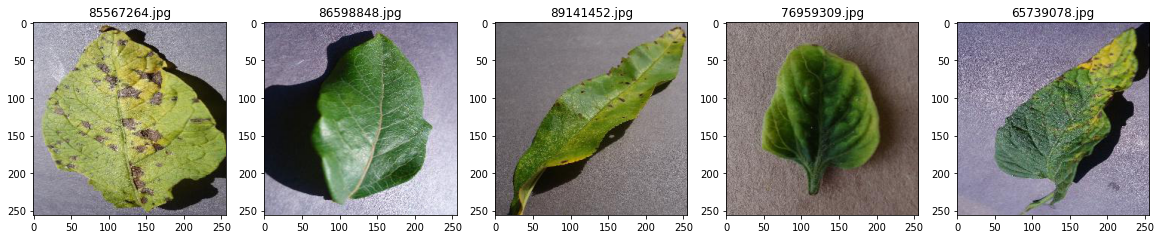

In [12]:
print("Images in training folder\n")
plt.figure(figsize=(20,20))
img_folder = r'TrainFiles/TrainFiles'
for i in range(5):
    file = np.random.choice(os.listdir(img_folder))
    image_path = os.path.join(img_folder, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

Images in test folder



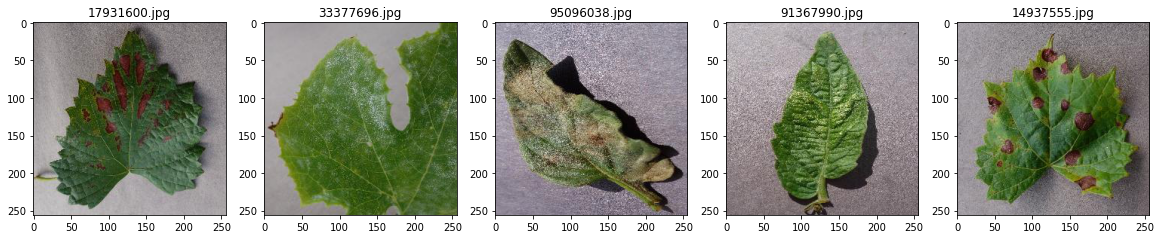

In [16]:
print("Images in test folder\n")
plt.figure(figsize=(20,20))
img_folder = r'TestFiles'
for i in range(5):
    file = np.random.choice(os.listdir(img_folder))
    image_path = os.path.join(img_folder, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

#### Set directory to image folder

In [9]:
base_dir = "TrainFiles/TrainFiles" 
test_dir = "TestFiles"

#### Model 1

Firstly, we created neural network model with the rbg color mode images.

#### Generate images with the labels from dataframe and split training and validation datasets with 70:30

In [32]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split = 0.30)
test_gen = ImageDataGenerator(rescale=1./255.)
train_gen = datagen.flow_from_dataframe(traindf,directory=  base_dir,x_col="FileName",y_col="Label",subset="training",target_size=(50, 50),color_mode="rgb",class_mode="categorical",
batch_size=32,shuffle=False,seed=123,validate_filenames=True)

valid_gen = datagen.flow_from_dataframe(traindf,directory=  base_dir,x_col="FileName",y_col="Label",subset="validation",target_size=(50, 50),color_mode="rgb",class_mode="categorical",
batch_size=32,shuffle=False,seed=123,validate_filenames=True)

test_gen = test_gen.flow_from_dataframe(testdf, directory= test_dir,x_col = "FileName", y_col = None, color_mode = "rgb", seed =43, batch_size=32,shuffle=False,
class_mode=None,target_size=(50,50))

Found 35000 validated image filenames belonging to 38 classes.
Found 15000 validated image filenames belonging to 38 classes.
Found 4000 validated image filenames.


#### Plot sample images from generated images

Sample Images from Training Set 



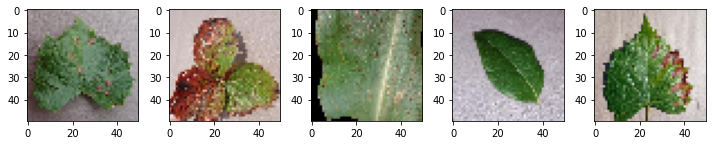

Sample Images from Validation Set 



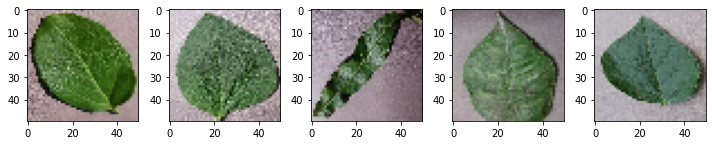

In [33]:
sample_training_images, _ = next(train_gen)
sample_valid_images, _ = next(valid_gen)
def PlotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    axes = axes.flatten() 
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
print("Sample Images from Training Set \n")
PlotImages(sample_training_images)
print("Sample Images from Validation Set \n")
PlotImages(sample_valid_images)

#### Create and complie neural network model

In [37]:
model = Sequential()
model.add(Conv2D(50, (3, 3), padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(50, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))
model.compile(optimizer = "adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### Model Fitting

In [ ]:
train_steps = train_gen.n//train_gen.batch_size
valid_steps = valid_gen.n//valid_gen.batch_size
#test_steps = test_generator.n//test_generator.batch_size
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
hist = model.fit(train_gen,steps_per_epoch = train_steps,validation_data = valid_gen, validation_steps= valid_steps, epochs=15)

Epoch 1/15
1093/1093 [==============================] - 435s 397ms/step - loss: 2.4466 - accuracy: 0.3444 - val_loss: 0.7968 - val_accuracy: 0.7616
Epoch 2/15
1093/1093 [==============================] - 400s 366ms/step - loss: 0.9383 - accuracy: 0.7127 - val_loss: 0.4699 - val_accuracy: 0.8508
Epoch 3/15
1093/1093 [==============================] - 413s 378ms/step - loss: 0.6239 - accuracy: 0.8008 - val_loss: 0.4040 - val_accuracy: 0.8705
Epoch 4/15
1093/1093 [==============================] - 539s 493ms/step - loss: 0.5177 - accuracy: 0.8307 - val_loss: 0.3811 - val_accuracy: 0.8797
Epoch 5/15
1093/1093 [==============================] - 389s 356ms/step - loss: 0.4277 - accuracy: 0.8608 - val_loss: 0.2898 - val_accuracy: 0.9054
Epoch 6/15
1093/1093 [==============================] - 391s 358ms/step - loss: 0.3646 - accuracy: 0.8794 - val_loss: 0.3041 - val_accuracy: 0.9039
Epoch 7/15
1093/1093 [==============================] - 405s 371ms/step - loss: 0.3123 - accuracy: 0.8965 - val_

#### Model Performance: Learning Curve

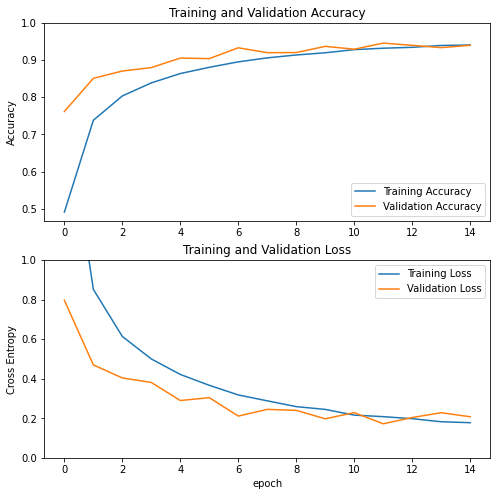

In [39]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#### Model Evaluation

In [40]:
test_steps = test_gen.n//test_gen.batch_size
scores = model.evaluate(valid_gen, steps = test_steps, verbose = 0)

In [41]:
Error = (100 - scores[1]*100)
Accuracy = scores[1]*100
print("Model 1 Error: %2s" % Error)
print("Model 1 Accuracy: %2s" % Accuracy)

Model 1 Error: 6.099998950958252
Model 1 Accuracy: 93.90000104904175


#### Model Prediction and Submission

In [42]:
test_gen.reset()
pred = model.predict(test_gen, verbose=1)
predicted_labels = np.argmax(pred,axis=1)
labels = (valid_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_labels]
submission = pd.DataFrame()
submission['Label'] = predictions
submission.to_csv('model1_botanist_submission.csv', index = False)
submission.head()

125/125 [==============================] - 18s 137ms/step


,Label
0,29
1,26
2,25
3,16
4,35


#### Model 2

We created neural network model with data augmentation with the output size (32,32).

In [10]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split = 0.30)
test_gen = ImageDataGenerator(rescale=1./255.)
train_gen = datagen.flow_from_dataframe(traindf,directory=  base_dir,x_col="FileName",y_col="Label",subset="training",target_size=(32, 32),color_mode="rgb",class_mode="categorical",
batch_size=32,shuffle=False,seed=123,validate_filenames=True)

valid_gen = datagen.flow_from_dataframe(traindf,directory=  base_dir,x_col="FileName",y_col="Label",subset="validation",target_size=(32, 32),color_mode="rgb",class_mode="categorical",
batch_size=32,shuffle=False,seed=123,validate_filenames=True)

test_gen = test_gen.flow_from_dataframe(testdf, directory= test_dir,x_col = "FileName", y_col = None, color_mode = "rgb", seed =43, batch_size=32,shuffle=False,
class_mode=None,target_size=(32,32))

Found 35000 validated image filenames belonging to 38 classes.
Found 15000 validated image filenames belonging to 38 classes.
Found 4000 validated image filenames.


#### Plot Sample Images

Sample Images from Training Set 



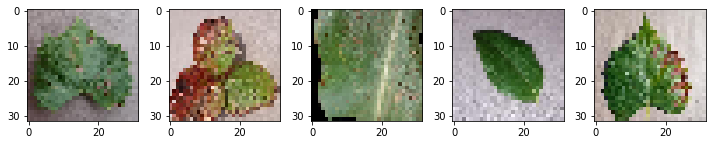

Sample Images from Validation Set 



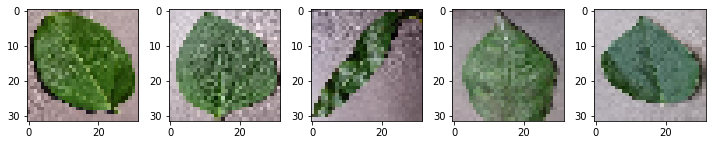

In [11]:
sample_training_images, _ = next(train_gen)
sample_valid_images, _ = next(valid_gen)
def PlotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    axes = axes.flatten() 
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
print("Sample Images from Training Set \n")
PlotImages(sample_training_images)
print("Sample Images from Validation Set \n")
PlotImages(sample_valid_images)

#### Create and Complie Neural Network Model

In [12]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',input_shape=(32,32,3)))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(38, activation='softmax'))
model2.compile(optimizer = "adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [20]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

#### Model Fitting

In [ ]:
train_steps = train_gen.n//train_gen.batch_size
valid_steps = valid_gen.n//valid_gen.batch_size
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
hist2 = model2.fit(train_gen,steps_per_epoch = train_steps,validation_data = valid_gen, validation_steps= valid_steps, epochs=15)

Epoch 1/15
1093/1093 [==============================] - 397s 361ms/step - loss: 2.4514 - accuracy: 0.3391 - val_loss: 0.7802 - val_accuracy: 0.7620
Epoch 2/15
1093/1093 [==============================] - 155s 142ms/step - loss: 0.9765 - accuracy: 0.7024 - val_loss: 0.5221 - val_accuracy: 0.8305
Epoch 3/15
1093/1093 [==============================] - 159s 146ms/step - loss: 0.7034 - accuracy: 0.7784 - val_loss: 0.4529 - val_accuracy: 0.8573
Epoch 4/15
1093/1093 [==============================] - 155s 142ms/step - loss: 0.6002 - accuracy: 0.8081 - val_loss: 0.3586 - val_accuracy: 0.8876
Epoch 5/15
1093/1093 [==============================] - 193s 177ms/step - loss: 0.5031 - accuracy: 0.8416 - val_loss: 0.3404 - val_accuracy: 0.8903
Epoch 6/15
1093/1093 [==============================] - 155s 142ms/step - loss: 0.4437 - accuracy: 0.8587 - val_loss: 0.2843 - val_accuracy: 0.9084
Epoch 7/15
1093/1093 [==============================] - 152s 139ms/step - loss: 0.4033 - accuracy: 0.8706 - val_

#### Model Evaluation

In [16]:
test_steps = test_gen.n//test_gen.batch_size
scores = model2.evaluate(valid_gen, steps = test_steps, verbose = 0)
Error = (100 - scores[1]*100)
Accuracy = scores[1]*100
print("Model 1 Error: %2s" % Error)
print("Model 1 Accuracy: %2s" % Accuracy)

Model 1 Error: 6.050002574920654
Model 1 Accuracy: 93.94999742507935


#### Model Performance: Learning Curve

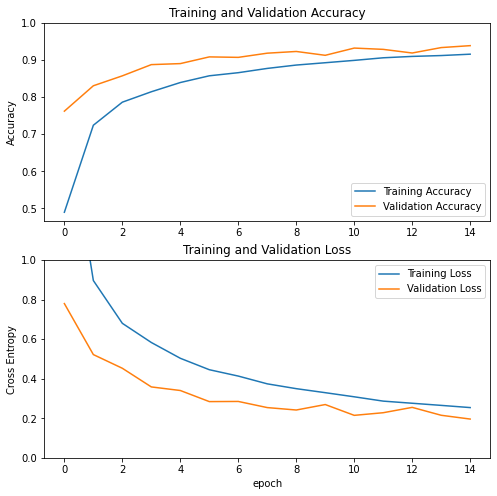

In [15]:
acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']

loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#### Model Prediction and Submission

In [22]:
test_gen.reset()
pred = model2.predict(test_gen, steps = test_steps, verbose=1)
predicted_labels = np.argmax(pred,axis=1)
labels = (valid_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_labels]
submission = pd.DataFrame()
submission['FileNames'] = testdf['FileName']
submission['Label'] = predictions
submission.to_csv('model2_botanist_submission.csv', index = False)
submission.head()

125/125 [==============================] - 8s 62ms/step


,FileNames,Label
0,64559325.jpg,29
1,52439467.jpg,26
2,1336013.jpg,25
3,77778059.jpg,16
4,28148617.jpg,35
